<a href="https://colab.research.google.com/github/LeHoangHoa0941/CNN_AI_6_training_image/blob/main/Cifa100_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img

In [2]:
from keras.datasets import cifar100

In [3]:
(X_train,Y_train),(X_test,Y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 4s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

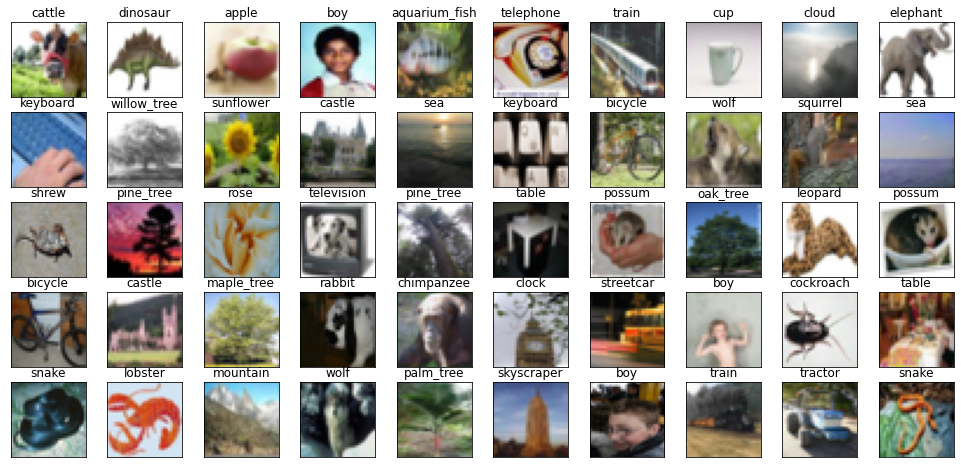

In [6]:
fig, axes = plt.subplots(ncols=10, nrows=5, figsize=(17, 8))
index = 0
for i in range(5):
    for j in range(10):
        axes[i,j].set_title(labels[Y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255
Y_train = to_categorical (Y_train,100)
Y_test = to_categorical (Y_test,100)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers.core.flatten import Flatten

In [14]:
  from keras.layers.core.flatten import Flatten
  model = Sequential([
      Conv2D(16,(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
      MaxPooling2D(),
      Dropout(0.2),
      Conv2D(32,(3,3), padding='same', activation='relu'),
      MaxPooling2D(),
      Conv2D(64,(3,3), padding='same', activation='relu'),
      MaxPooling2D(),
      Dropout(0.2),
      Conv2D(128,(3,3), padding='same', activation='relu'),
      MaxPooling2D(),
      Dropout(0.2),
      Conv2D(128,(3,3), padding='same', activation='relu'),
      MaxPooling2D(),
      Dropout(0.2),
      Flatten(),
      Dense(512, activation='relu'),
      Dense(100, activation='softmax')
  ])
  model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)         

In [15]:
from tensorflow.keras.optimizers import SGD
#opt = SGD(lr = 0.01, momentum= 0.9)
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics =['accuracy'])
history=model.fit(X_train,Y_train,epochs=100,batch_size=64,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/100
782/782 [==============================] - 6s 7ms/step - loss: 4.1707 - accuracy: 0.0516 - val_loss: 3.8383 - val_accuracy: 0.0885
Epoch 2/100
782/782 [==============================] - 5s 6ms/step - loss: 3.6293 - accuracy: 0.1311 - val_loss: 3.4834 - val_accuracy: 0.1623
Epoch 3/100
782/782 [==============================] - 5s 6ms/step - loss: 3.3139 - accuracy: 0.1890 - val_loss: 3.1758 - val_accuracy: 0.2211
Epoch 4/100
782/782 [==============================] - 5s 6ms/step - loss: 3.1327 - accuracy: 0.2229 - val_loss: 3.0136 - val_accuracy: 0.2508
Epoch 5/100
782/782 [==============================] - 6s 8ms/step - loss: 2.9916 - accuracy: 0.2480 - val_loss: 2.8916 - val_accuracy: 0.2774
Epoch 6/100
782/782 [==============================] - 5s 7ms/step - loss: 2.8860 - accuracy: 0.2705 - val_loss: 2.8269 - val_accuracy: 0.2894
Epoch 7/100
782/782 [==============================] - 5s 6ms/step - loss: 2.7969 - accuracy: 0.2855 - val_loss: 2.7315 - val_accuracy: 0.3113

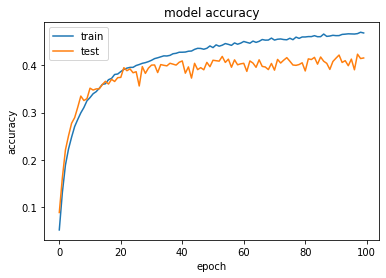

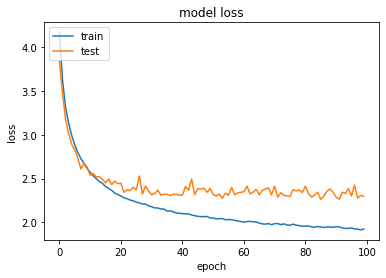

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.save('Cifa100_CNN.h5')

In [18]:
from keras.models import load_model
model5 = load_model('Cifa100_CNN.h5')

Dự đoán là hình:  dolphin
Thực tế là hình:  mountain


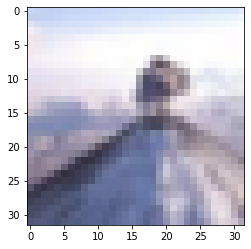

In [32]:
y_pred = model5.predict(X_test[[0]])
plt.imshow(X_test[0])
print('Dự đoán là hình: ', labels[np.argmax(y_pred)])
print('Thực tế là hình: ', labels[np.argmax(Y_test[0])])

Dự đoán là hình:  rose
Thực tế là hình:  rose


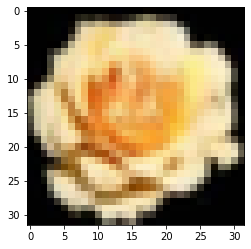

In [34]:
y_pred = model5.predict(X_test[[20]])
plt.imshow(X_test[20])
print('Dự đoán là hình: ', labels[np.argmax(y_pred)])
print('Thực tế là hình: ', labels[np.argmax(Y_test[20])])

Dự đoán là hình:  pear
Thực tế là hình:  pear


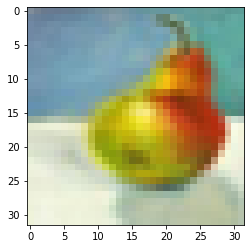

In [35]:
y_pred = model5.predict(X_test[[108]])
plt.imshow(X_test[108])
print('Dự đoán là hình: ', labels[np.argmax(y_pred)])
print('Thực tế là hình: ', labels[np.argmax(Y_test[108])])

Dự đoán là hình:  apple
Thực tế là hình:  pear


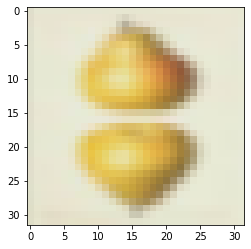

In [36]:
y_pred = model5.predict(X_test[[231]])
plt.imshow(X_test[231])
print('Dự đoán là hình: ', labels[np.argmax(y_pred)])
print('Thực tế là hình: ', labels[np.argmax(Y_test[231])])